**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [58]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [59]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [60]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [61]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [62]:
R_train=R_train.dropna()

In [63]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [64]:
R_train.head()

,theta,theta_past_ma10
1,27,26.0
2,25,26.5
3,22,26.0
4,19,25.0
5,19,23.8


In [65]:
R_test.head()

,theta,theta_past_ma10
154,35,34.7
155,30,34.5
156,36,33.7
157,37,33.6
158,37,33.5


## Define the Train and Test (X,y)


In [66]:
C_train.head()

,congested,theta_past_ma10
1,1,26.0
2,1,26.5
3,1,26.0
4,1,25.0
5,1,23.8


In [67]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [68]:
C_test.head()

,congested,theta_past_ma10
154,1,34.7
155,1,34.5
156,1,33.7
157,1,33.6
158,1,33.5


In [69]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [70]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

# Machine Learning Regression

## important global packages

In [71]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [72]:
R_train.head()

,theta,theta_past_ma10
1,27,26.0
2,25,26.5
3,22,26.0
4,19,25.0
5,19,23.8


In [73]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [74]:
R_test.head()

,theta,theta_past_ma10
154,35,34.7
155,30,34.5
156,36,33.7
157,37,33.6
158,37,33.5


In [75]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [76]:
from sklearn import linear_model

In [77]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [78]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.04453206280327815


In [79]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,34.640099
1,34.450904
2,33.694124
3,33.599527
4,33.504929
...,...
71,43.059277
72,44.099850
73,43.532265
74,41.545717


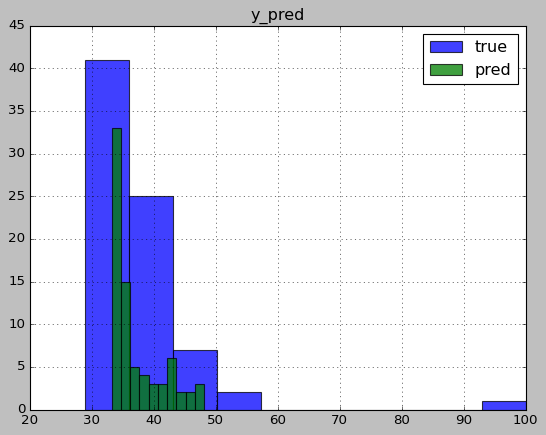

In [80]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-82-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [83]:
# calculate R2
from sklearn.metrics import r2_score

In [84]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.347888339476639


In [85]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,31.889548
1,35.655714
2,43.563833
3,38.014071
4,37.129071
...,...
71,30.500000
72,30.500000
73,30.500000
74,30.500000


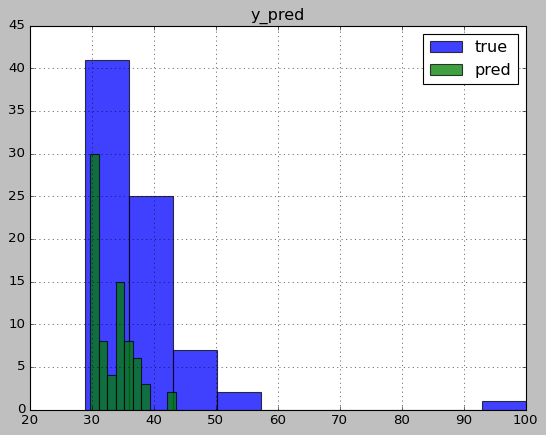

In [86]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
